# Домашня робота №7

# Перетворення випадкових величин

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## 1 Квантильне перетворення

### 1.1 Задана щільність

Нехай випадкова величина $\xi$ має щільність
$f(x) = a \sin(x) I_{[0, \pi]}(x),$
де $I_{[c, d]}(x)$ - індикатор на відрізку $[c, d]$.

Знайдіть значення параметра $a$.

Згенеруйте $n = 100000$ значень випадкової величини $\xi$ за допомогою квантильного перетворення.

Намалюйте нормовану гістограму отриманих $n = 100000$ значень випадкової величини $\xi$ разом з її функцією щільності.

$\int_0^\pi f(x) = \int_0^\pi a \sin(x) = 1 \Rightarrow a = \frac{1}{ \int_0^\pi f(x)}$

$f(x) = a \sin(x) \Rightarrow F(x) = -a \cos(x)  \Rightarrow F^{-1}(x) = acos (-\frac{x}{a})$

a = 0.5


/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


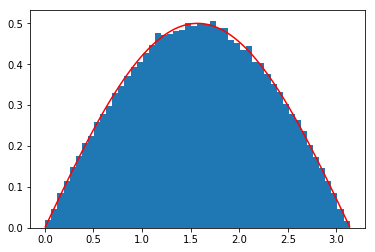

In [2]:
# here is trouble. f(x) lower than it has to be, because of the parameter

from scipy.stats import uniform
from scipy.integrate import quad

integral_value, error_value = quad(np.sin, 0, np.pi)

a = 1 / integral_value
print('a =',a)

x = uniform.rvs(-0.5, 1, 100000)

F = lambda x: np.arccos(-x/a)
F = np.vectorize(F)

xi = F(x)

f = lambda x: a*np.sin(x) if 0<=x<=np.pi else 0
f = np.vectorize(f)

plt.hist(xi, normed=True, bins=50)

xi.sort()
plt.plot(xi, f(xi), color='red')
plt.show()

### 1.2 Нормальний розподіл

Нехай випадкова величина $\xi \sim N(0, 1)$.

Згенеруйте $n = 100000$ значень випадкової величини $\xi$ за допомогою квантильного перетворення.

Намалюйте нормовану гістограму отриманих $n = 100000$ значень випадкової величини $\xi$ разом з її функцією щільності.


$
    f_\xi(x) = \frac{1}{\sqrt{2\pi}} e^{\frac{-x^2}{2}} \Rightarrow
    x = \sqrt{-2ln(\sqrt{2\pi}f_\xi(x))}
$

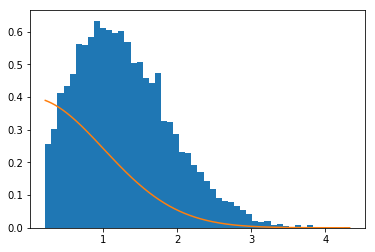

In [50]:
x = uniform.rvs(0, 0.39, 10000)

def f(x):
    return np.sqrt( -2*( np.log( np.sqrt(2*np.pi)* x ) ) )

def N(x):
    return np.e**(-x**2/2)/np.sqrt(2*np.pi)

plt.hist(f(x), density=True, bins=50)

#x = np.linspace(0,4,1000)
x = f(x)
x.sort()
plt.plot(x, N(x))
plt.show()

## 2 Відсутність пам'яті

Розглянемо випадкову величину $\xi$ з геометричного розподілу з параметром $p = 0.5$.
Тобто $\xi \sim Geom(0.5)$.

1. Згенеруйте $n = 10000$ значень випадкової величини $\xi$;
2. Реалізуйте 2 сабплоти в одному рядку;
3. На першому сабплоті намалюйте:
   - нормовану гістограму згенерованих $n = 10000$ значень випадкової величини $\xi$;
   - функцію ймовірностей випадкової величини $\xi$;
4. Отримайте $n = 10000$ значень випадкової величини $\eta = (\xi - 1) I_{(\xi - 1) > 0}$;
5. На другому сабплоті намалюйте:
   - нормовану гістограму отриманих значень випадкової величини $\eta$;
   - функцію ймовірностей випадкової величини $\xi$.

**Зауваження 1.** Графік функції ймовірнстей краще малювати для $10$ значень.

**Зауваження 2.** У гістограмах проміжок значень слід розбивати на одиничні інтервали.

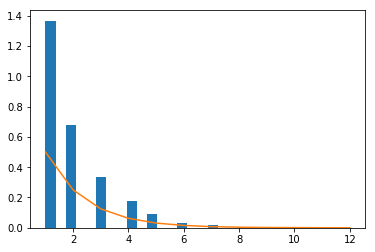

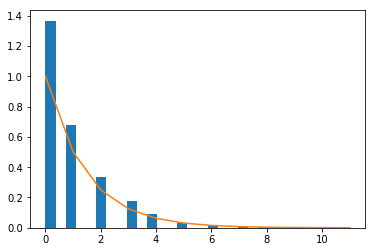

In [60]:
from scipy.stats import geom
p = 0.5

x = geom.rvs(0.5, size=10000)

f = lambda x: 0 if x-1 < 0 else x-1
f = np.vectorize(f)

x1 = f(x)

plt.hist(x, bins=30, density=True)

f = lambda x: (1-p)**(x-1)*p
x.sort()
plt.plot(x, f(x))
plt.show()

plt.hist(x1, bins=30, density=True)
x1.sort()
plt.plot(x1, f(x1))
plt.show()


## 3 Задача 1.11.3

Розглянемо випадкову величину $\xi$ зі стандартного експоненційного розподілу.
Тобто $\xi \sim Exp(1)$.

### 3.1 Експонента

1. Згенеруйте $n = 10000$ значень випадкової величини $\xi$;
2. Реалізуйте 2 сабплоти в одному рядку;
3. На першому сабплоті намалюйте:
   - нормовану гістограму згенерованих $n = 10000$ значень випадкової величини $\xi$;
   - функцію щільності випадкової величини $\xi$;
4. Отримайте $n = 10000$ значень випадкової величини $\eta = \exp\{-\xi\}$ (застосуйте функцію модуль до згенерованих $n = 10000$ значень випадкової величини $\xi$);
5. На другому сабплоті намалюйте:
   - нормовану гістограму отриманих $n = 10000$ значень випадкової величини $\eta$;
   - функцію щільності випадкової величини $\xi$;
   - функцію щільності випадкової величини $\eta$.

In [6]:
# Місце для Вашого коду



### 3.2 Квадрат

1. Згенеруйте $n = 10000$ значень випадкової величини $\xi$;
2. Реалізуйте 2 сабплоти в одному рядку;
3. На першому сабплоті намалюйте:
   - нормовану гістограму згенерованих $n = 10000$ значень випадкової величини $\xi$;
   - функцію щільності випадкової величини $\xi$;
4. Отримайте $n = 10000$ значень випадкової величини $\eta = \xi^2$ (застосуйте функцію модуль до згенерованих $n = 10000$ значень випадкової величини $\xi$);
5. На другому сабплоті намалюйте:
   - нормовану гістограму отриманих $n = 10000$ значень випадкової величини $\eta$;
   - функцію щільності випадкової величини $\xi$;
   - функцію щільності випадкової величини $\eta$.

In [7]:
# Місце для Вашого коду



## 4 Задача 1.11.5

Розглянемо випадкову величину $\xi$ зі стандартного рівномірного розподілу.
Тобто $\xi \sim Unif(0, 1)$.

### 4.1 Лінійне перетворення

1. Згенеруйте $n = 10000$ значень випадкової величини $\xi$;
2. Реалізуйте 2 сабплоти в одному рядку;
3. На першому сабплоті намалюйте:
   - нормовану гістограму згенерованих $n = 10000$ значень випадкової величини $\xi$;
   - функцію щільності випадкової величини $\xi$;
4. Отримайте $n = 10000$ значень випадкової величини $\eta = 3 \xi - 2$ (застосуйте функцію модуль до згенерованих $n = 10000$ значень випадкової величини $\xi$);
5. На другому сабплоті намалюйте:
   - нормовану гістограму отриманих $n = 10000$ значень випадкової величини $\eta$;
   - функцію щільності випадкової величини $\xi$;
   - функцію щільності випадкової величини $\eta$.

In [8]:
# Місце для Вашого коду



### 4.2 Модуль від лінійного перетворення

1. Згенеруйте $n = 10000$ значень випадкової величини $\xi$;
2. Реалізуйте 2 сабплоти в одному рядку;
3. На першому сабплоті намалюйте:
   - нормовану гістограму згенерованих $n = 10000$ значень випадкової величини $\xi$;
   - функцію щільності випадкової величини $\xi$;
4. Отримайте $n = 10000$ значень випадкової величини $\eta = |2 \xi - 1|$ (застосуйте функцію модуль до згенерованих $n = 10000$ значень випадкової величини $\xi$);
5. На другому сабплоті намалюйте:
   - нормовану гістограму отриманих $n = 10000$ значень випадкової величини $\eta$;
   - функцію щільності випадкової величини $\xi$;
   - функцію щільності випадкової величини $\eta$.

In [9]:
# Місце для Вашого коду



### 4.3 Логарифм

1. Згенеруйте $n = 10000$ значень випадкової величини $\xi$;
2. Реалізуйте 2 сабплоти в одному рядку;
3. На першому сабплоті намалюйте:
   - нормовану гістограму згенерованих $n = 10000$ значень випадкової величини $\xi$;
   - функцію щільності випадкової величини $\xi$;
4. Отримайте $n = 10000$ значень випадкової величини $\eta = - \log \xi$ (застосуйте функцію модуль до згенерованих $n = 10000$ значень випадкової величини $\xi$);
5. На другому сабплоті намалюйте:
   - нормовану гістограму отриманих $n = 10000$ значень випадкової величини $\eta$;
   - функцію щільності випадкової величини $\xi$;
   - функцію щільності випадкової величини $\eta$.

In [10]:
# Місце для Вашого коду



## 5 Одиничний квадрат

Реалізуйте вадкову величину рівномірно розподілену на одиничному квадраті.
Тобто $\xi = (x, y), \quad x, y \sim Unif(0, 1)$.

In [11]:
# Місце для Вашого коду



Знайдіть функцію щільності випадкової величини $\xi_1 = x^2 + y^2$.
Намалюйте її разом із нормованою гістограмою $n = 100000$ значень випадкової величини $\xi_1$,
отриманою перетвореннями випадкових величин $x, y$.

In [12]:
# Місце для Вашого коду



Знайдіть функцію щільності випадкової величини $\xi_2 = \max (x, y)$.
Намалюйте її разом із нормованою гістограмою $n = 100000$ значень випадкової величини $\xi_2$,
отриманою перетвореннями випадкових величин $x, y$.

In [13]:
# Місце для Вашого коду



Знайдіть функцію щільності випадкової величини $\xi_3 = |x - y|$.
Намалюйте її разом із нормованою гістограмою $n = 100000$ значень випадкової величини $\xi_3$,
отриманою перетвореннями випадкових величин $x, y$.

In [14]:
# Місце для Вашого коду

